## Neural Network with one hidden layer from scratch

Implementing a Neural Network model with one hidden layer from scratch using Numpy

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from generate_data import gen_train_dataset, gen_test_dataset

%matplotlib inline
np.random.seed(42)

### Working with the data

In [53]:
X_train, y_train = gen_train_dataset(5000)
X_test, y_test = gen_test_dataset(750)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2, 5000)
(1, 5000)
(2, 750)
(1, 750)


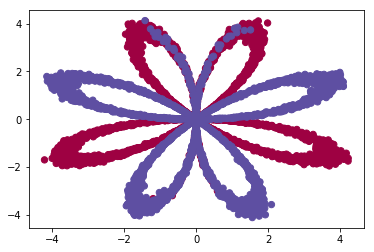

In [54]:
# Visualize train set

plt.scatter(X_train[0, :], X_train[1, :], c=y_train.ravel(), s=40, cmap=plt.cm.Spectral)

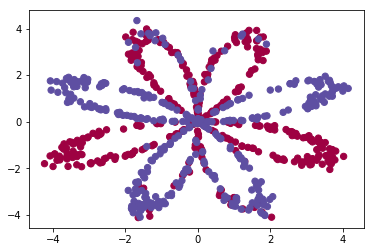

In [55]:
# Visualize the test set

plt.scatter(X_test[0,:], X_test[1,:], c=y_test.ravel(), s=40, cmap=plt.cm.Spectral)

In [5]:
shape_x = X_train.shape
shape_y = y_train.shape

m = X_train.shape[1]
num_features = X_train.shape[0]

print("(nx,m)=({},{})".format(num_features,m))

(nx,m)=(2,5000)


### Neural Network Architecture and helper functions

In [6]:
def layer_sizes(X, y):
    '''
    Input: The number of input features and the number of output variable(1)
    Output: Number of neurons in input layer nx, hidden layer nh, output layer ny
    '''
    
    nx = X.shape[0]
    nh = 4 # constant hidden units
    ny = y.shape[0]
    
    return nx, nh, ny

In [7]:
def sigmoid(z):
    '''
    Returns the sigmoid function of z
    '''
    return 1/(1 + np.exp(-z))

In [8]:
def initialize_parameters(nx, nh, ny):
    '''
    Input: Number of neurons in input, hidden and output layer
    Output: A dictionary containing W1, b1, W2, b2
    '''
    
    W1 = np.random.randn(nx, nh) * 0.01
    b1 = np.zeros((nh, 1))
    W2 = np.random.randn(nh, ny) * 0.01
    b2 = np.zeros((ny, 1))
    
    initial_params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return initial_params

In [28]:
def forward_propagation(X, y , parameters):
    '''
    Computes Z1, A1, Z2, A2 and Cost/Loss
    Input: X, y, a dictionary containing W1, b1, W2, b2
    Output: Cost J, dictionary containing the intermediate values
    '''
    
    m = X.shape[1] # Number of training examples
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1.T, X) + b1 # Shape: (nh,nx) . (nx,m) -> (nh,m)
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2.T, A1) + b2 # Shape: (ny,nh) . (nh,m) -> (ny,m)
    A2 = sigmoid(Z2)
    
    assert(A1.shape == (W1.shape[1], m))
    assert(A2.shape == (W2.shape[1], m))
    
    J = (-1/m) * np.sum(y * np.log(A2) + (1-y) * np.log(1-A2))
    J = np.squeeze(J)
    
    intermed = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    
    return J, intermed
    

In [29]:
def backpropagation(X, y, intermed, params):
    '''
    Computes the derivatives dW2, db2, dW1, db1 through backpropagation
    Input: Training data X, labels y, a dictionary containing Z1, A1, Z2, A2
    Output: A dictionary containing the derivatives dW1, db1, dW2, db2
    '''
    
    m = X.shape[1]
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    Z1 = intermed['Z1']
    A1 = intermed['A1']
    Z2 = intermed['Z2']
    A2 = intermed['A2']
    
    dZ2 = A2 - y # Shape: (ny,m)
    dW2 = (1/m) * np.dot(A1, dZ2.T) # Shape: (nh,m).(m,ny) -> (nh,ny)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True) # Shape: (ny,1)
    dZ1 = np.dot(W2,dZ2) * (1 - np.power(A1, 2)) # Shape: (nh,ny) . (ny,m) -> (nh,m) * (nh,m) -> (nh,m)
    dW1 = (1/m) * np.dot(X, dZ1.T) # Shape: (nx,m) . (m,nh) -> (nx,nh)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True) # Shape: (nh,1)
    
    assert(dW1.shape == W1.shape)
    assert(db1.shape == b1.shape)
    assert(dW2.shape == W2.shape)
    assert(db2.shape == b2.shape)
    
    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    
    return gradients
    

In [34]:
def train(X, y, epochs, alpha, verbose):
    '''
    Function to run the training on the input data and update the weights and biases
    Output: A list of cost for each epoch and the updated parameters
    '''
    
    costs = []
    nx, nh, ny = layer_sizes(X, y)
    
    params = initialize_parameters(nx, nh, ny)
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    for i in range(1, epochs+1):
        
        J, intermediate_vals = forward_propagation(X, y, params)
        
        costs.append(J)
        
        gradients = backpropagation(X, y, intermediate_vals, params)
        
        dW1 = gradients['dW1']
        db1 = gradients['db1']
        dW2 = gradients['dW2']
        db2 = gradients['db2']
        
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
        
        params['W1'] = W1
        params['b1'] = b1
        params['W2'] = W2
        params['b2'] = b2
        
        if verbose:
            if i == 1 or i % 100 == 0:
                print("Epoch: {}, Loss: {}".format(i, J))
                
    return costs, params
        
        

In [35]:
def predict(X, params, threshold):
    '''
    Function to compute the prediction
    Output: An ndarray (1,m) of predictions for the given input X of shape (nx,m) 
    '''
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    assert(X.shape[0] == W1.shape[0])
    
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2.T, A1) + b2
    A2 = sigmoid(Z2)
    
    predictions = [(lambda pred: 0 if activation < threshold else 1)(activation) for activation in np.squeeze(A2)]
    predictions = np.array(predictions).reshape(1,-1)
    
    return predictions    
    

In [36]:
def single_layer_NN(X_train, y_train, X_test, y_test, epochs=10000, alpha=1.3, verbose=True, threshold=0.5):
    '''
    An all encompassing function to perform training, prediction and compute accuracy
    Output: A dictionary model that contains the details of the single layer NN model
    '''
    
    costs, params = train(X_train, y_train, epochs, alpha, verbose)
    yhat_train = predict(X_train, params, threshold)
    yhat_test = predict(X_test, params, threshold)
    
    train_acc = 100 - np.mean(np.abs(yhat_train - y_train)) * 100
    test_acc = 100 - np.mean(np.abs(yhat_test - y_test)) * 100
    
    print("Train Accuracy: {:.6f}".format(train_acc))
    print("Test Accuracy: {:.6f}".format(test_acc))
    
    model = {
        'param' : params,
        'cost' : costs,
        'learning_rate' : alpha,
        'epoch' : epochs,
        'train_accuracy' : train_acc,
        'test_accuracy' : test_acc
    }
    
    return model
                              

In [56]:
model = single_layer_NN(X_train, y_train, X_test, y_test, epochs=10000, alpha=1.3, verbose=True, threshold=0.5)

Epoch: 1, Loss: 0.6932858207668258
Epoch: 100, Loss: 0.31267401332712297
Epoch: 200, Loss: 0.25953129394480356
Epoch: 300, Loss: 0.24598931073531685
Epoch: 400, Loss: 0.23887486135361252
Epoch: 500, Loss: 0.23425865013453404
Epoch: 600, Loss: 0.2309181693436262
Epoch: 700, Loss: 0.22826503089299655
Epoch: 800, Loss: 0.22577434609145594
Epoch: 900, Loss: 0.22317924829710042
Epoch: 1000, Loss: 0.2214674255993322
Epoch: 1100, Loss: 0.22008984197791698
Epoch: 1200, Loss: 0.21892409996205534
Epoch: 1300, Loss: 0.21791879773291076
Epoch: 1400, Loss: 0.21703942904182233
Epoch: 1500, Loss: 0.21626120363341425
Epoch: 1600, Loss: 0.21556558697280181
Epoch: 1700, Loss: 0.21493835606395043
Epoch: 1800, Loss: 0.21436838923768284
Epoch: 1900, Loss: 0.21384686009853723
Epoch: 2000, Loss: 0.21336667616924826
Epoch: 2100, Loss: 0.2129220758654698
Epoch: 2200, Loss: 0.21250833271902794
Epoch: 2300, Loss: 0.21212153461409453
Epoch: 2400, Loss: 0.21175841672521598
Epoch: 2500, Loss: 0.2114162335902867
Epo

### Performance comparison with a simple Logistic Regression model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [59]:
log_model = LogisticRegression()
log_model.fit(X_train.T, y_train.T)

C:\Users\admin\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
log_model_predict = log_model.predict(X_test.T)
nn_predict = predict(X_test, params, 0.5)

In [61]:
print("Simple Logistic Regression")
print(classification_report(log_model_predict, y_test.T))

print("NN with single hidden layer")
print(classification_report(nn_predict.T, y_test.T))

Simple Logistic Regression
              precision    recall  f1-score   support

           0       0.39      0.41      0.40       357
           1       0.43      0.41      0.42       393

    accuracy                           0.41       750
   macro avg       0.41      0.41      0.41       750
weighted avg       0.41      0.41      0.41       750

NN with single hidden layer
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       369
           1       0.88      0.87      0.87       381

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



#### Bottomline:

###### The Neural Network model with a single hidden layer of 4 units performed twice better compared to a simple Logistic Regression model on the same train and test data